### ## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

### 1. Create a `data` folder in your local project repository. 

### 2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

### 2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

### 3.	Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
    7662 Rows, 4 Columns
    Country or Area = object,
    Year = int64,
    Value = float64,
    Value Footnotes = float64

## 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
c_entries = gdp_df['Country'].value_counts() ##seeing how many times seach country is represented
c_entries = c_entries.reset_index()
c_entries

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [8]:
all_years = c_entries[c_entries["count"] == 33] ##getting all countries with all 33 years
all_years

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
197,Finland,33
198,Europe & Central Asia (excluding high income),33
199,Ghana,33
200,Euro area,33


### 202 countries have all years

In [9]:
missing_years = c_entries[c_entries["count"] < 33]  ##finding out how many countries have less than 33 years
missing_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 202 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  40 non-null     object
 1   count    40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


### 40 countries are missing years

In [10]:
years = gdp_df.groupby("Year")["Country"].count()
years

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64

### more countries are represented each year until 2021

### 8. 

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
y2020 = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending=False)
y2020

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


(array([64., 29., 38., 28., 12., 11.,  7.,  8.,  7., 10.,  7.,  4.,  5.,
         3.,  1.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([   711.35526342,   5152.95364294,   9594.55202246,  14036.15040198,
         18477.74878149,  22919.34716101,  27360.94554053,  31802.54392005,
         36244.14229956,  40685.74067908,  45127.3390586 ,  49568.93743812,
         54010.53581763,  58452.13419715,  62893.73257667,  67335.33095619,
         71776.9293357 ,  76218.52771522,  80660.12609474,  85101.72447426,
         89543.32285377,  93984.92123329,  98426.51961281, 102868.11799233,
        107309.71637184, 111751.31475136]),
 <BarContainer object of 25 artists>)

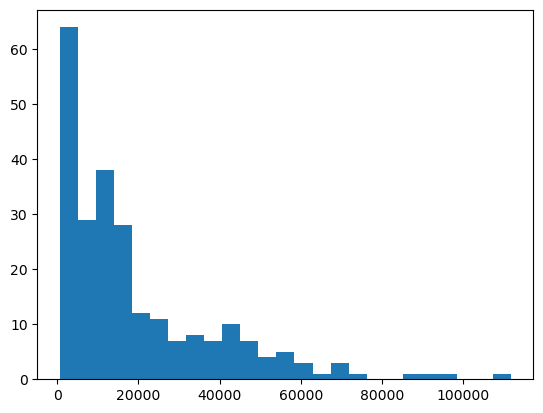

In [12]:
### histogram using matplotlib

plt.hist(y2020.GDP_Per_Capita, bins=25)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

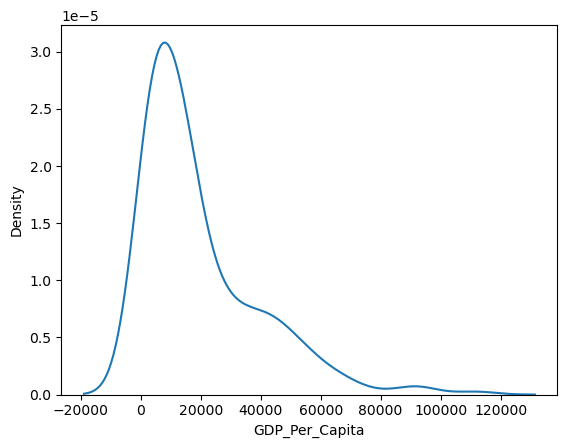

In [13]:
### Density plot using seaborn ###

sns.kdeplot(y2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

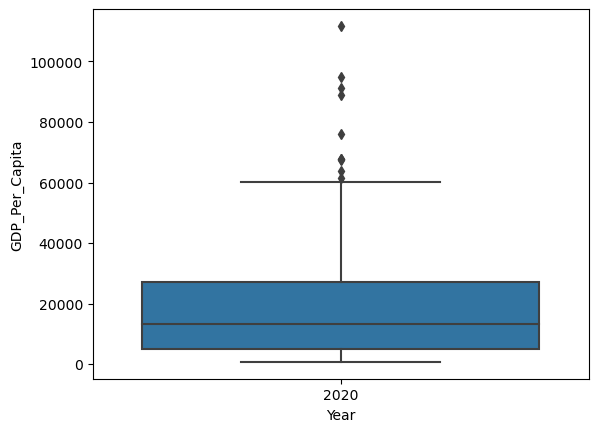

In [14]:
## boxplot using seaborn

sns.boxplot(x=y2020["Year"], y=y2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

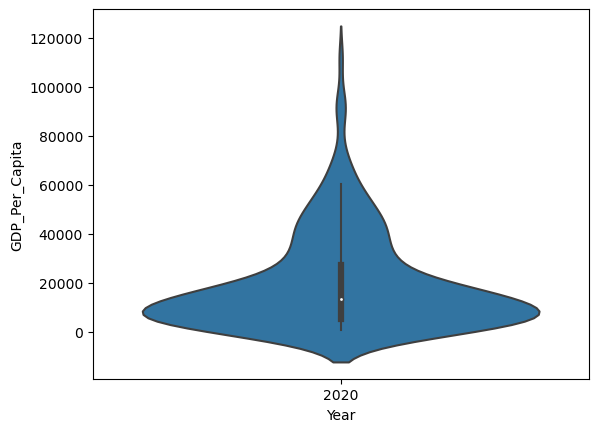

In [15]:
## violin plot using seaborn

sns.violinplot(x=y2020["Year"], y=y2020["GDP_Per_Capita"])


### Answer: Histogram provides the most detail by showing the sample size in detail. Violin and Density show sample size in relative terms. Box plot is great at showing the outliers but has no sample size information.

### 9. What was the median GDP per capita value in 2020?

In [16]:
y2020.GDP_Per_Capita.median()

13357.997573370474

### 13357.99

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

In [17]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

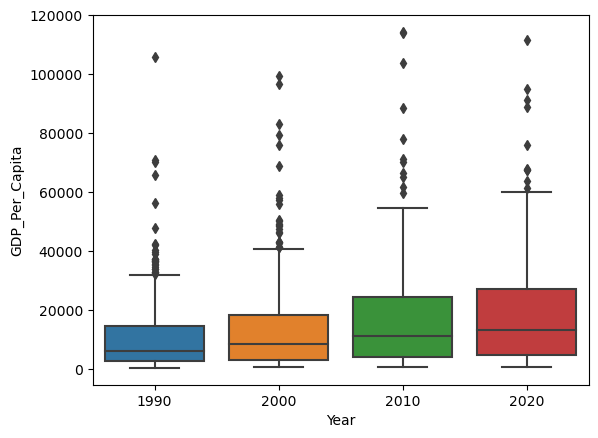

In [18]:
## box plot 

sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

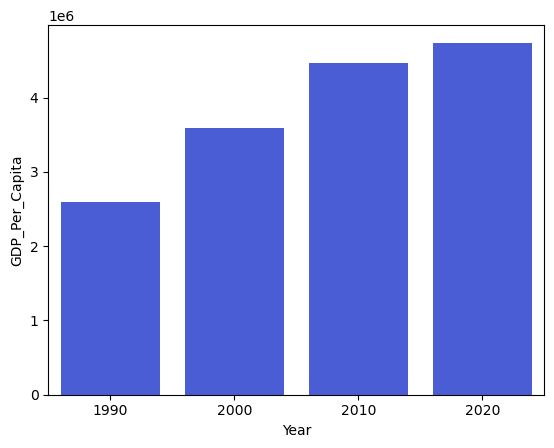

In [19]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    errorbar=None, 
    color='#344ceb');

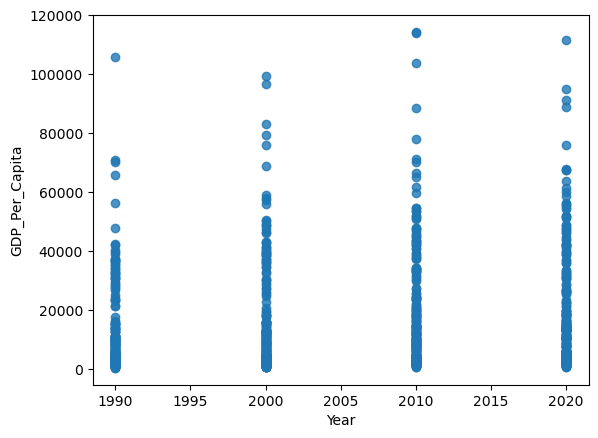

In [20]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    fit_reg=False
)
plt.show()

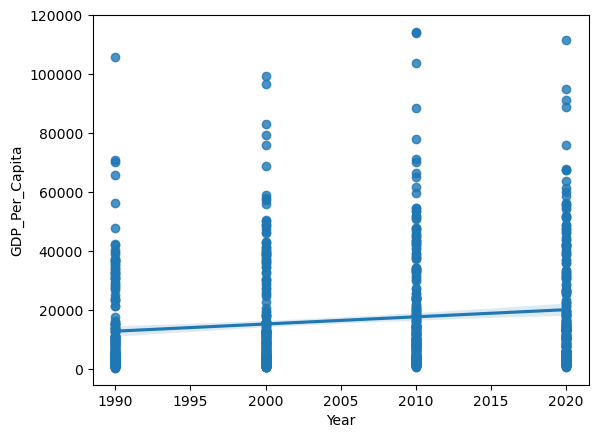

In [21]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],

)
plt.show()

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [22]:
GDP100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

In [23]:
Earliest = GDP100k['Year'].min()

In [24]:
First_100k = GDP100k[GDP100k['Year'] == Earliest]
First_100k

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


### Answer: United Arab Emirates

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [25]:
y2020[y2020.GDP_Per_Capita == y2020.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [26]:
Lux = gdp_df[gdp_df.Country == "Luxembourg"]

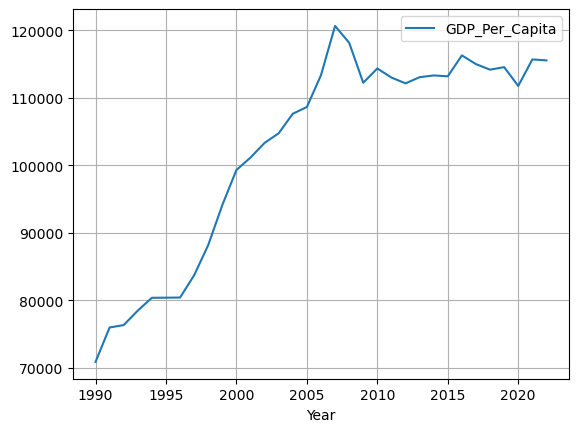

In [27]:
# Create line chart with Pandas
Lux.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # Default argument
               grid=True, # Add a grid in the background
              )
plt.show()

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [28]:
y2020[y2020.GDP_Per_Capita == y2020.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [29]:
Burundi = gdp_df[gdp_df.Country == "Burundi"]

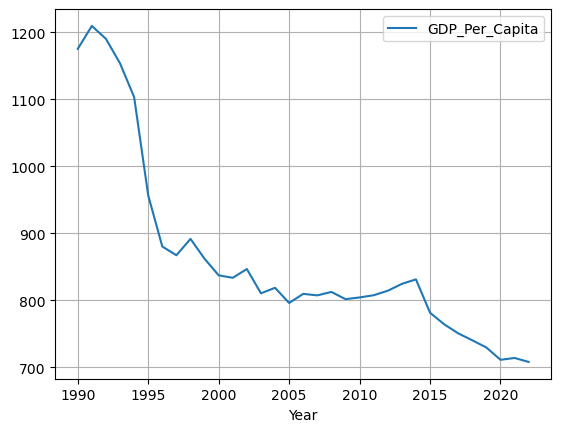

In [30]:
# Create line chart with Pandas
Burundi.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # Default argument
               grid=True, # Add a grid in the background
              )
plt.show()

### Bonus question: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [31]:
Bonus = gdp_df[gdp_df.Year.isin([1990, 2020])]
Bonus.head(2)

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119


In [32]:
Bonus.groupby("Year")["GDP_Per_Capita"].mean()

Year
1990    12506.088374
2020    19586.754446
Name: GDP_Per_Capita, dtype: float64

#### on average countries had a higher GDP per capita in 2020 compared to 1990

In [33]:
Bonus2 = Bonus.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")

In [34]:
Bonus2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    207 non-null    float64
 1   2020    242 non-null    float64
dtypes: float64(2)
memory usage: 5.7+ KB


In [35]:
Bonus2[Bonus2[1990] > Bonus2[2020]]

Year,1990,2020
Country,,
Barbados,14097.395550,13805.777541
Brunei,70358.724094,61603.550804
Burundi,1175.155086,711.355263
Central African Republic,1200.613390,847.765012
Congo,5007.319245,3384.654335
Dem. Rep. Congo,1750.169739,1044.071214
Fragile and conflict affected situations,4864.814075,4357.621312
Gabon,17559.006114,13903.288955
Guinea-Bissau,1998.173206,1803.630591


### The countries above had a higher GDP_Per_Capita in 1990 vs 2020

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [36]:
internet_df = pd.read_csv("../data/internet_use.csv",nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [37]:
internet_df = internet_df.drop(columns="Value Footnotes")

In [38]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [39]:
internet_df.Year.value_counts().sort_values()

Year
1960      7
1980      7
1965      7
1970      7
1975      7
1976      7
1978      7
1979      7
1977      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1982      7
1988      7
1989      8
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
2003    196
1999    198
2004    199
2000    199
2006    200
2001    201
2005    201
2014    202
2002    202
2013    202
2009    203
2010    203
2012    203
2008    204
2007    206
2011    207
1990    210
Name: count, dtype: int64

### 1990 is the highest reported year for some reason

### 17. What is the first year to have a non-zero internet users percentage value?

In [40]:
first_year = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_year.sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


In [41]:
first_year.Year.min()

1990

### Answer: 1990

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [42]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [43]:
perc_diff = internet_df[internet_df['Year'].isin([2000, 2014])]
perc_diff

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

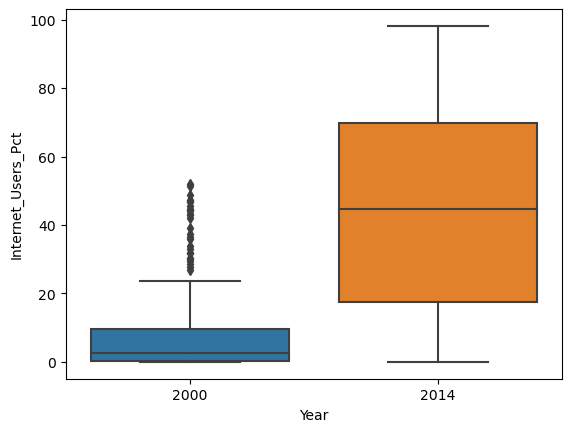

In [44]:
sns.boxplot(x=perc_diff["Year"], y=perc_diff["Internet_Users_Pct"])

#### Answer: Many countries reported near zero percent in 2000 with the highest percent being around 60%. in 2014 more countries reported at least moderate access, while more "developed" countries approached 100%.

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [45]:
perc_diff[(perc_diff['Internet_Users_Pct'] < 5) & (perc_diff['Year'] == 2014)].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

#### Answer: 16 countried reported <5% access in 2014

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [46]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='outer').sort_values('Country')

In [47]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
7663,Afghanistan,1990,NaN,0.000000
19,Afghanistan,2002,1280.463171,0.004561
18,Afghanistan,2003,1292.333437,0.087891
17,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
7640,Zimbabwe,2011,2033.181375,15.700000
7641,Zimbabwe,2010,1799.540233,11.500000
7642,Zimbabwe,2009,1500.379785,11.360000
7636,Zimbabwe,2015,2313.878553,NaN


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [48]:
Top3 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

Top3 = Top3.sort_values('Internet_Users_Pct', ascending = False).head(3)

In [49]:
Top3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30


In [50]:
Top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(Top3.Country)]

D:\Software\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


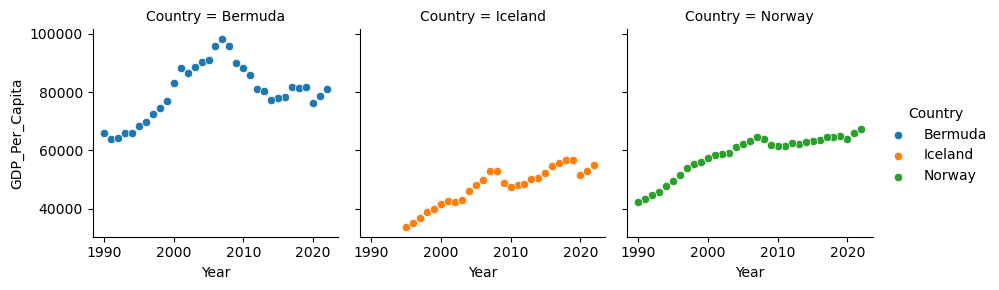

In [51]:
g = sns.FacetGrid(Top3, col="Country", hue="Country")
g.map_dataframe(sns.scatterplot, x="Year", y="GDP_Per_Capita")
g.add_legend()

#### Answer: All three countries seem to experience a ride in GDP per capita following 2014. While taking a hit in 2020, all three countries bounced back.

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [52]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

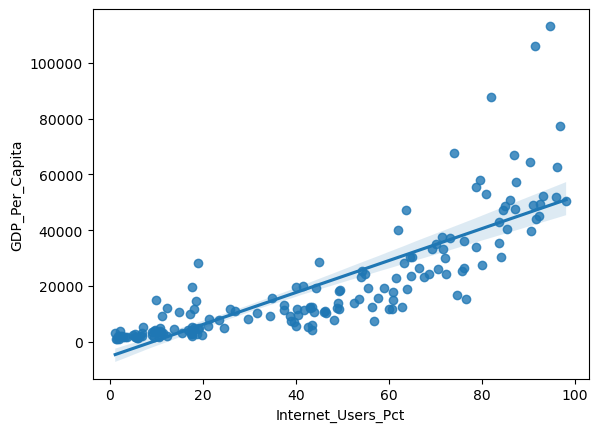

In [53]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"])

In [54]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4187,"Macao SAR, China",2014,151616.402364,NaN
4154,Luxembourg,2014,113313.578898,94.67
5752,Qatar,2014,106141.326189,91.49
6114,Singapore,2014,87702.521984,82.00
687,Bermuda,2014,77361.104881,96.80
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


#### Answer: In general, a higher Internet User Percentage correlated to a higher GDP per Capita. Luxembourg and Qatar report >90% internet users and report very high GDP/C. It's possible that once a certain level of internt access is attained, the GDP benefits become exponential. China reports a VERY high GDP/C but does not report Internet Users.


### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [55]:
gdp_per_capita_2014 = gdp_and_internet_use_2014
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
7542,West Bank and Gaza,2014,5967.073437,NaN
7571,World,2014,15120.730322,NaN
8716,Yemen,2014,NaN,22.55
7604,Zambia,2014,3375.941270,17.34


In [56]:
pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q=3).head(7)

7         (765.259, 7099.217]
28        (765.259, 7099.217]
61        (765.259, 7099.217]
94      (7099.217, 19769.859]
127     (7099.217, 19769.859]
7665                      NaN
160     (7099.217, 19769.859]
Name: GDP_Per_Capita, dtype: category
Categories (3, interval[float64, right]): [(765.259, 7099.217] < (7099.217, 19769.859] < (19769.859, 151616.402]]

In [57]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, q=3,
                                                  labels=['Low',
                                                         'Medium',
                                                         'High'])

C:\Users\MattM\AppData\Local\Temp\ipykernel_20932\179674598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, q=3,


In [59]:
gdp_per_capita_2014 = gdp_per_capita_2014.reset_index()
gdp_per_capita_2014

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
0,7,Afghanistan,2014,2144.449634,6.39,Low
1,28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
2,61,Africa Western and Central,2014,4146.994622,NaN,Low
3,94,Albania,2014,11586.817446,60.10,Medium
4,127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...,...
276,7542,West Bank and Gaza,2014,5967.073437,NaN,Low
277,7571,World,2014,15120.730322,NaN,Medium
278,8716,Yemen,2014,NaN,22.55,NaN
279,7604,Zambia,2014,3375.941270,17.34,Low


### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [65]:
print("Low")
print(gdp_per_capita_2014[gdp_per_capita_2014['GDP_group'] == "Low"]['Internet_Users_Pct'].median())

print("Medium")
print(gdp_per_capita_2014[gdp_per_capita_2014['GDP_group'] == "Medium"]['Internet_Users_Pct'].median())

print("High")
print(gdp_per_capita_2014[gdp_per_capita_2014['GDP_group'] == "High"]['Internet_Users_Pct'].median())

Low
10.6
Medium
43.4
High
78.7
